First, we need to initialize PySpark and all the libraries needed

In [68]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pyspark.ml import Pipeline
from pyspark.ml.regression import RandomForestRegressor, GBTRegressor, LinearRegression
from pyspark.ml.feature import VectorIndexer
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml.feature import VectorAssembler
import findspark
findspark.init()

import pyspark 
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()

df = spark.sql('''select 'spark' as hello ''')
df.show()

+-----+
|hello|
+-----+
|spark|
+-----+




Let's now calculate the temperature trend in the 3 months of February, March and April

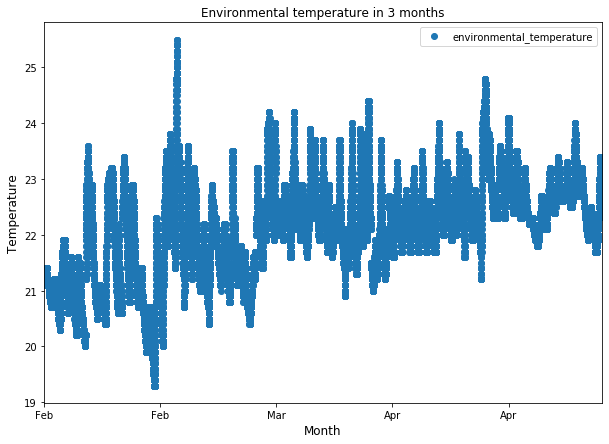

In [73]:
import numpy
df = pd.read_csv("../Ivan Compagnucci/EDA-EnterpriseDataAnalytics-project/Data/Prediction data/environmental.csv")

df.plot(x='Month', y='environmental_temperature', style='o',figsize=(10,7))  
plt.title('Environmental temperature in 3 months')  
plt.xlabel('Month', size=12)  
plt.ylabel('Temperature', size=12) 

plt.show()

Seeing the trend of temperatures during the months of February, March and April we can see (as expected) an increase in the average temperature.
Now we will divide the dataset per month and we will calculate the average of the environmental temperature for each month

In [80]:
dfFEB = df[df['Month'] == 'Feb']
dfMAR = df[df['Month'] == 'Mar']
dfAPR = df[df['Month'] == 'Apr']

dfMAR.to_csv("../Ivan Compagnucci/EDA-EnterpriseDataAnalytics-project/Data/Prediction data/environmentalMAR.csv", index=False)
dfFEB.to_csv("../Ivan Compagnucci/EDA-EnterpriseDataAnalytics-project/Data/Prediction data/environmentalFEB.csv", index=False)
dfAPR.to_csv("../Ivan Compagnucci/EDA-EnterpriseDataAnalytics-project/Data/Prediction data/environmentalAPR.csv", index=False)

print("File separated by year!")

TempAVGFEB = dfFEB["environmental_temperature"].mean()
TempAVGMAR = dfMAR["environmental_temperature"].mean()
TempAVGAPR = dfAPR["environmental_temperature"].mean()

print("The average environmental temperature in Febraury was:",TempAVGFEB)
print("The average environmental temperature in March was:",TempAVGMAR)
print("The average environmental temperature in April was:",TempAVGAPR)

File separated by year!
The average environmental temperature in Febraury was: 21.55947390802531
The average environmental temperature in March was: 22.16208463949834
The average environmental temperature in April was: 22.53172182967599


To apply linear regression, I have to change the nominal variables of the months to numeric variables. 
Meanwhile, let's eliminate useless columns for each month.

In [81]:
dfFEB= pd.read_csv("../Ivan Compagnucci/EDA-EnterpriseDataAnalytics-project/Data/Prediction data/environmentalFEB.csv")
dfFEB['srtDate'] = pd.to_datetime(dfFEB['srtDate'],utc=True)
dfFEB['Month'] = dfFEB['srtDate'].dt.month
dfFEB['Time'] = dfFEB['srtDate'].dt.strftime("%H:%M:%S")
dfFEB.to_csv("../Ivan Compagnucci/EDA-EnterpriseDataAnalytics-project/Data/Prediction data/environmentalFEB.csv", index=False)
dfFEB= pd.read_csv("../Ivan Compagnucci/EDA-EnterpriseDataAnalytics-project/Data/Prediction data/environmentalFEB.csv", usecols=['absolute_humidity','device_temperature','dew_point','environmental_temperature','pressure','relative_humidity','sequence_number','Month','Day','Time'])
dfFEB.to_csv("../Ivan Compagnucci/EDA-EnterpriseDataAnalytics-project/Data/Prediction data/environmentalFEB.csv",index=False)

dfMAR= pd.read_csv("../Ivan Compagnucci/EDA-EnterpriseDataAnalytics-project/Data/Prediction data/environmentalMAR.csv")
dfMAR['srtDate'] = pd.to_datetime(dfMAR['srtDate'],utc=True)
dfMAR['Month'] = dfMAR['srtDate'].dt.month
dfMAR['Time'] = dfMAR['srtDate'].dt.strftime("%H:%M:%S")
dfMAR.to_csv("../Ivan Compagnucci/EDA-EnterpriseDataAnalytics-project/Data/Prediction data/environmentalMAR.csv", index=False)
dfMAR= pd.read_csv("../Ivan Compagnucci/EDA-EnterpriseDataAnalytics-project/Data/Prediction data/environmentalMAR.csv", usecols=['absolute_humidity','device_temperature','dew_point','environmental_temperature','pressure','relative_humidity','sequence_number','Month','Day','Time'])
dfMAR.to_csv("../Ivan Compagnucci/EDA-EnterpriseDataAnalytics-project/Data/Prediction data/environmentalMAR.csv",index=False)

dfAPR= pd.read_csv("../Ivan Compagnucci/EDA-EnterpriseDataAnalytics-project/Data/Prediction data/environmentalAPR.csv")
dfAPR['srtDate'] = pd.to_datetime(dfAPR['srtDate'],utc=True)
dfAPR['Month'] = dfAPR['srtDate'].dt.month
dfAPR['Time'] = dfAPR['srtDate'].dt.strftime("%H:%M:%S")
dfAPR.to_csv("../Ivan Compagnucci/EDA-EnterpriseDataAnalytics-project/Data/Prediction data/environmentalAPR.csv", index=False)
dfAPR= pd.read_csv("../Ivan Compagnucci/EDA-EnterpriseDataAnalytics-project/Data/Prediction data/environmentalAPR.csv", usecols=['absolute_humidity','device_temperature','dew_point','environmental_temperature','pressure','relative_humidity','sequence_number','Month','Day','Time'])
dfAPR.to_csv("../Ivan Compagnucci/EDA-EnterpriseDataAnalytics-project/Data/Prediction data/environmentalAPR.csv",index=False)

df= pd.read_csv("../Ivan Compagnucci/EDA-EnterpriseDataAnalytics-project/Data/Prediction data/environmental.csv")
df['srtDate'] = pd.to_datetime(df['srtDate'],utc=True)
df['Month'] = df['srtDate'].dt.month
df['Time'] = df['srtDate'].dt.strftime("%H:%M:%S")
df.to_csv("../Ivan Compagnucci/EDA-EnterpriseDataAnalytics-project/Data/Prediction data/environmental.csv",index=False)
df= pd.read_csv("../Ivan Compagnucci/EDA-EnterpriseDataAnalytics-project/Data/Prediction data/environmental.csv", usecols=['absolute_humidity','device_temperature','dew_point','environmental_temperature','pressure','relative_humidity','sequence_number','Month','Day','Time'])
df.to_csv("../Ivan Compagnucci/EDA-EnterpriseDataAnalytics-project/Data/Prediction data/environmental.csv",index=False)
df 

,absolute_humidity,device_temperature,dew_point,environmental_temperature,pressure,relative_humidity,sequence_number,Month,Day,Time
0,8.8,4.0,9.6,21.1,99716.0,48.0,1.0,2,2,09:24:09
1,8.8,4.0,9.6,21.1,99715.0,48.0,2.0,2,2,09:26:09
2,8.8,4.0,9.6,21.1,99713.0,48.0,3.0,2,2,09:28:10
3,8.8,4.0,9.6,21.1,99722.0,48.0,4.0,2,2,09:30:10
4,8.8,4.0,9.6,21.1,99724.0,48.0,5.0,2,2,09:32:11
...,...,...,...,...,...,...,...,...,...,...
48039,10.4,7.0,12.2,22.5,101126.0,52.0,34.0,4,30,23:51:39
48040,10.4,7.0,12.2,22.5,101122.0,52.0,35.0,4,30,23:53:40
48041,10.4,7.0,12.2,22.5,101129.0,52.0,36.0,4,30,23:55:40
48042,10.4,7.0,12.2,22.5,101126.0,52.0,37.0,4,30,23:57:40


Now, let's use import the **PySpark** features for our prediction:
<ul>
  <li><b>Pipeline:</b> From pyspark.ml, ML Pipelines provide a uniform set of high-level APIs built on top of DataFrames that help users create and tune practical machine learning pipelines. </li>
  <li><b>From pyspark.ml.regression</b> A set of different linear regression algorithms (RandomForestRegressor, GBTRegressor, LinearRegression)</li>
  <li><b>From pyspark.ml.feature</b> VectorIndexer and VectorAssembler for extract,transform e select relevant value</li>
  <li><b>From pyspark.ml.evaluation</b> import Regression Evaluator for the evaluation of the regression models </li>
</ul>

In [100]:
from pyspark.ml import Pipeline
from pyspark import SparkConf, SparkContext
from pyspark.sql import SQLContext
from pyspark.ml.regression import RandomForestRegressor, GBTRegressor, LinearRegression
from pyspark.ml.feature import VectorIndexer, VectorAssembler
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml.linalg import Vectors  
from pyspark.ml.feature import VectorAssembler 

In [82]:
#create spark dataframe of input csv file 
df=spark.read.csv('../Ivan Compagnucci/EDA-EnterpriseDataAnalytics-project/Data/Prediction data/environmental.csv'
                  ,inferSchema=True,header=True) 
df.show(10) 


+-----------------+------------------+---------+-------------------------+--------+-----------------+---------------+-----+---+--------+
|absolute_humidity|device_temperature|dew_point|environmental_temperature|pressure|relative_humidity|sequence_number|Month|Day|    Time|
+-----------------+------------------+---------+-------------------------+--------+-----------------+---------------+-----+---+--------+
|              8.8|               4.0|      9.6|                     21.1| 99716.0|             48.0|            1.0|    2|  2|09:24:09|
|              8.8|               4.0|      9.6|                     21.1| 99715.0|             48.0|            2.0|    2|  2|09:26:09|
|              8.8|               4.0|      9.6|                     21.1| 99713.0|             48.0|            3.0|    2|  2|09:28:10|
|              8.8|               4.0|      9.6|                     21.1| 99722.0|             48.0|            4.0|    2|  2|09:30:10|
|              8.8|               4.0|   

In [96]:
from pyspark.ml.feature import StringIndexer 
#to work on the features, spark MLlib expects every value to be in numeric form 
#feature 'Time is string datatype 
#Creating vectors from features 
#Apache MLlib takes input if vector form 
indexer=StringIndexer(inputCol='Time',outputCol='Time of event') 
indexed=indexer.fit(df).transform(df) 
  
#above code will convert string to numeric feature and create a new dataframe 
#new dataframe contains a new feature 'cruise_cat' and can be used further 
#feature cruise_cat is now vectorized and can be used to fed to model 
for item in indexed.head(5): 
    print(item) 
    print('\n') 


Row(absolute_humidity=8.8, device_temperature=4.0, dew_point=9.6, environmental_temperature=21.1, pressure=99716.0, relative_humidity=48.0, sequence_number=1.0, Month=2, Day=2, Time='09:24:09', Time of event=18394.0)


Row(absolute_humidity=8.8, device_temperature=4.0, dew_point=9.6, environmental_temperature=21.1, pressure=99715.0, relative_humidity=48.0, sequence_number=2.0, Month=2, Day=2, Time='09:26:09', Time of event=13005.0)


Row(absolute_humidity=8.8, device_temperature=4.0, dew_point=9.6, environmental_temperature=21.1, pressure=99713.0, relative_humidity=48.0, sequence_number=3.0, Month=2, Day=2, Time='09:28:10', Time of event=32023.0)


Row(absolute_humidity=8.8, device_temperature=4.0, dew_point=9.6, environmental_temperature=21.1, pressure=99722.0, relative_humidity=48.0, sequence_number=4.0, Month=2, Day=2, Time='09:30:10', Time of event=23769.0)


Row(absolute_humidity=8.8, device_temperature=4.0, dew_point=9.6, environmental_temperature=21.1, pressure=99724.0, relative

In [98]:
assembler=VectorAssembler(inputCols=['absolute_humidity', 
 'device_temperature', 
 'dew_point', 
 'environmental_temperature', 
 'pressure', 
 'relative_humidity', 
 'Month',
 'Day',
 'Time of event'],outputCol='features') 

output=assembler.transform(indexed) 
output.select('features','environmental_temperature').show(5) 


+--------------------+-------------------------+
|            features|environmental_temperature|
+--------------------+-------------------------+
|[8.8,4.0,9.6,21.1...|                     21.1|
|[8.8,4.0,9.6,21.1...|                     21.1|
|[8.8,4.0,9.6,21.1...|                     21.1|
|[8.8,4.0,9.6,21.1...|                     21.1|
|[8.8,4.0,9.6,21.1...|                     21.1|
+--------------------+-------------------------+
only showing top 5 rows



Now thanks to the __train_test_split method__ from the PySpark module, we can divide the datasets into two datasets: one for the train (80%) and the remaining data for the test (20%). 
This procedure will be performed on the .csv file containing all the months and on the 3 .csv files of the separate months.

In [117]:
#final data consist of features and label which is crew. 
final_data=output.select('features','environmental_temperature') 
#splitting data into train and test 
train_data,test_data=final_data.randomSplit([0.7,0.3]) 
print('The variables value in the train set')
train_data.describe().show()

print('The variables value in the test set')
test_data.describe().show()

The variables value in the train set
+-------+-------------------------+
|summary|environmental_temperature|
+-------+-------------------------+
|  count|                    33611|
|   mean|       22.103653565796947|
| stddev|       0.8688591003908755|
|    min|                     19.3|
|    max|                     25.5|
+-------+-------------------------+

The variables value in the test set
+-------+-------------------------+
|summary|environmental_temperature|
+-------+-------------------------+
|  count|                    14433|
|   mean|        22.09293979075701|
| stddev|       0.8851560802226974|
|    min|                     19.3|
|    max|                     25.5|
+-------+-------------------------+



In [143]:

#creating an object of class LinearRegression 
#object takes features and label as input arguments 
model_lr=LinearRegression(featuresCol='features',labelCol='environmental_temperature') 
#pass train_data to train model 
trained_model=model_lr.fit(train_data) 
#evaluating model trained for Rsquared error 
model_results=trained_model.evaluate(train_data) 
print('Rsquared Error :',model_results.r2) 
#R2 value shows accuracy of model is 92% 
#model accuracy is very good and can be use for predictive analysis 


Rsquared Error : 1.0


In [111]:
#testing Model on unlabeled data 
#create unlabeled data from test_data 
#testing model on unlabeled data 
unlabeled_data=test_data.select('features') 
unlabeled_data.show(5) 

+--------------------+
|            features|
+--------------------+
|[5.8,5.0,3.5,20.8...|
|[6.0,5.0,4.0,20.8...|
|[6.0,5.0,4.0,20.8...|
|[6.2,5.0,4.4,20.8...|
|[6.2,5.0,4.4,20.9...|
+--------------------+
only showing top 5 rows



In [149]:
predictions=trained_ship_model.transform(unlabeled_data) 
predictions.show() 
#below are the results of output from test data 

+--------------------+------------------+
|            features|        prediction|
+--------------------+------------------+
|[5.8,5.0,3.5,20.8...|20.799999999999116|
|[6.0,5.0,4.0,20.8...|20.799999999999564|
|[6.0,5.0,4.0,20.8...|20.799999999999564|
|[6.2,5.0,4.4,20.8...|20.799999999999784|
|[6.2,5.0,4.4,20.9...|20.899999999999345|
|[6.2,5.0,4.5,20.9...| 20.89999999999962|
|[6.2,5.0,4.5,20.9...| 20.89999999999962|
|[6.2,5.0,4.6,21.1...| 21.09999999999907|
|[6.3,4.0,4.8,20.4...| 20.39999999999981|
|[6.3,4.0,4.8,20.4...|20.399999999999814|
|[6.3,5.0,4.6,21.1...|21.099999999999408|
|[6.3,5.0,4.7,21.2...| 21.19999999999924|
|[6.3,5.0,4.7,21.2...|21.199999999999246|
|[6.4,4.0,4.9,20.5...|20.500000000000014|
|[6.4,4.0,4.9,20.5...|20.499999999999993|
|[6.4,4.0,4.9,20.5...|20.500000000000014|
|[6.4,4.0,4.9,20.5...| 20.50000000000003|
|[6.4,4.0,4.9,20.5...| 20.49999999999999|
|[6.4,4.0,4.9,20.5...| 20.50000000000003|
|[6.4,4.0,4.9,20.5...| 20.50000000000001|
+--------------------+------------

Now, let's save the predictions file in .csv format for adjustments and changes

In [164]:
predictions.toPandas().to_csv('../Ivan Compagnucci/EDA-EnterpriseDataAnalytics-project/Data/Prediction data/environmentalPrediction.csv')